<a href="https://colab.research.google.com/github/gusriobr/keras/blob/master/stacked_rnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np

timesteps = 60
input_dim = 64
samples = 10000
batch_size = 128
output_dim = 64

# Test data.
x_np = np.random.random((samples, timesteps, input_dim))
y_np = np.random.random((samples, output_dim))

print('Classic stacked LSTM: 35s/epoch on CPU')
inputs = keras.Input((timesteps, input_dim))
x = keras.layers.LSTM(output_dim, return_sequences=True)(inputs)
x = keras.layers.LSTM(output_dim, return_sequences=True)(x)
x = keras.layers.LSTM(output_dim)(x)

classic_model = keras.models.Model(inputs, x)
classic_model.compile(optimizer='rmsprop', loss='mse')
history = classic_model.fit(x_np, y_np, batch_size=batch_size, epochs=4)



Using TensorFlow backend.


Classic stacked LSTM: 35s/epoch on CPU
Epoch 1/4
10000/10000 [==============================] - 23s 2ms/step - loss: 0.0943
Epoch 2/4
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0838
Epoch 3/4
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0836
Epoch 4/4
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0836


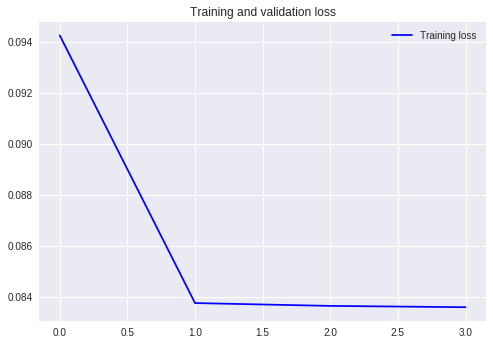

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
print('New stacked LSTM: 30s/epoch on CPU (15pct faster)')
cells = [
    keras.layers.LSTMCell(output_dim),
    keras.layers.LSTMCell(output_dim),
    keras.layers.LSTMCell(output_dim),
]

inputs = keras.Input((timesteps, input_dim))
x = keras.layers.RNN(cells)(inputs)

new_model = keras.models.Model(inputs, x)
new_model.compile(optimizer='rmsprop', loss='mse')
history = new_model.fit(x_np, y_np, batch_size=batch_size, epochs=4)

New stacked LSTM: 30s/epoch on CPU (15pct faster)
Epoch 1/4
10000/10000 [==============================] - 22s 2ms/step - loss: 0.0938
Epoch 2/4
10000/10000 [==============================] - 20s 2ms/step - loss: 0.0837
Epoch 3/4
10000/10000 [==============================] - 20s 2ms/step - loss: 0.0836
Epoch 4/4
10000/10000 [==============================] - 20s 2ms/step - loss: 0.0836


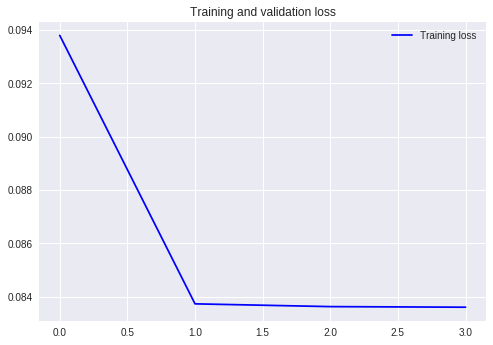

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()